# Basket Analysis
Author: Diana Hilleshein  
Data souse: <https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset>

In this project I perform basket analysis data analysis on Groceries Data using Phyton(Spyder) and JupiterLab.  

Apriori Algorithm for Association Rule Mining was chosen to exercise the basket analysis. Association rule mining is a technique to identify underlying relations between different items. More profit can be generated if the relationship between the items. For instance, if item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:  
- A and B can be placed together so that when a customer buys one of the product he doesn't have to go far away to buy the other product.  
- People who buy one of the products can be targeted through an advertisement campaign to buy the other.  
- Collective discounts can be offered on these products if the customer buys both of them.  
- Both A and B can be packaged together.  

## Theory of Apriori Algorithm  
There are three major components of the Apriori algorithm:  
- Support  
Support in our use case refers to the popularity of a movie and it is calculated as the number of times a movie is watched divided by the total number of transactions. Support(B) = (Transactions containing (B))/(Total Transactions)
- Confidence  
Confidence refers to the likelihood that an item B is also bought if item A is bought. Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
- Lift  
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A→B) = (Confidence (A→B))/(Support (B))

Reference: Association Rule Mining via Apriori Algorithm in Python, Usman M., StackAbuse, <https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/>.

## Data description

In [15]:
###data processing
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#load data
df = pd.read_csv("Groceries_dataset.csv")
df.info() #38765 obs, 3 cols
df.head()
#NAs
df.isnull().sum() # no NAs

C:\Users\chibi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


Member_number      0
Date               0
itemDescription    0
dtype: int64

The dataset provided on the kaggle website was loaded in 2020. It contains 38765 observations and tree columns:
 1. Member_number (int) - unique number of customer;
 2. itemDescription (obj) - category of the item in string format;
 3. Date (obj) - day, month and year of purchase.
 
Firstly, I change types of columns:
 1. Member_number: from int to str, since treating Member_number as numeric value does not make sense;
 2. itemDescription: from obj to str;
 3. Date: from obj to datetime.

In [5]:
#transformations
df.Member_number = df.Member_number.astype("string")
df.itemDescription = df.itemDescription.astype("string")
df.Date = pd.to_datetime(df.Date, dayfirst = True)
#grouping
#get set of items bought by the smae mamber at the same date
df_grouped_by_day_customer = df.groupby(["Date", "Member_number"], as_index = False).agg({"itemDescription": set}) 
df_grouped_by_day_customer = df_grouped_by_day_customer.iloc[:,-1]
df_grouped_by_day_customer = df_grouped_by_day_customer.values.tolist()
#from sets to lists since list of lists in expected later
maximum = 0
while maximum != len(df_grouped_by_day_customer):
    df_grouped_by_day_customer[maximum] = list(df_grouped_by_day_customer[maximum])
    maximum = maximum + 1
#encode to necessary format
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df_grouped_by_day_customer).transform(df_grouped_by_day_customer)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Analysis

### Itemsets with support > 0.001

In [11]:
from mlxtend.frequent_patterns import apriori
frequent_items = apriori(data, min_support=0.001, use_colnames=True) #many items
frequent_items = frequent_items.sort_values(['support'], ascending=False)
frequent_items

C:\Users\chibi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(chicken, margarine)"
201,0.001002,"(chicken, bottled beer)"
202,0.001002,"(chocolate, bottled beer)"
516,0.001002,"(pastry, hamburger meat)"


Support table can be interpret as following: "whole milk" can be found in 15.7% of all transactions and so on. The minimum threshold for the table is 0.001 that means that the product should appear at lest in 0.1& of all transactions.   

### Itemsets with lift > 1.2

In [12]:
from mlxtend.frequent_patterns import association_rules
ar2 =association_rules(frequent_items, metric="lift", min_threshold=1.2)
ar2

C:\Users\chibi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649
1,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,0.000607,1.014464
2,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
3,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531
4,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191
...,...,...,...,...,...,...,...,...,...
83,(candy),(citrus fruit),0.014369,0.053131,0.001002,0.069767,1.313120,0.000239,1.017884
84,(cat food),(tropical fruit),0.011829,0.067767,0.001002,0.084746,1.250543,0.000201,1.018551
85,(tropical fruit),(cat food),0.067767,0.011829,0.001002,0.014793,1.250543,0.000201,1.003008
86,(seasonal products),(rolls/buns),0.007084,0.110005,0.001002,0.141509,1.286395,0.000223,1.036698


Then itemsets with lift > 1.2 were filtered. Lift equal 1 indicates no association between itemsets, while lift greater then 1 indicates increase in the ratio of sale of consequents when antecedents are sold. 

In [16]:
graph = ar2[["antecedents", "consequents", "lift"]]
graph["antecedents"] = graph["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
graph["consequents"] = graph["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
graph

,antecedents,consequents,lift
0,sausage,bottled beer,1.222000
1,bottled beer,sausage,1.222000
2,sausage,curd,1.446615
3,curd,sausage,1.446615
4,brown bread,canned beer,1.362937
...,...,...,...
83,candy,citrus fruit,1.313120
84,cat food,tropical fruit,1.250543
85,tropical fruit,cat food,1.250543
86,seasonal products,rolls/buns,1.286395


Lift equal to 1.22 means that likelihood of buying bottled beer and sausage together is 1.22 times more than the likelihood of just buying bottled beer controlling for popularity (support) of the products.

### Network plot

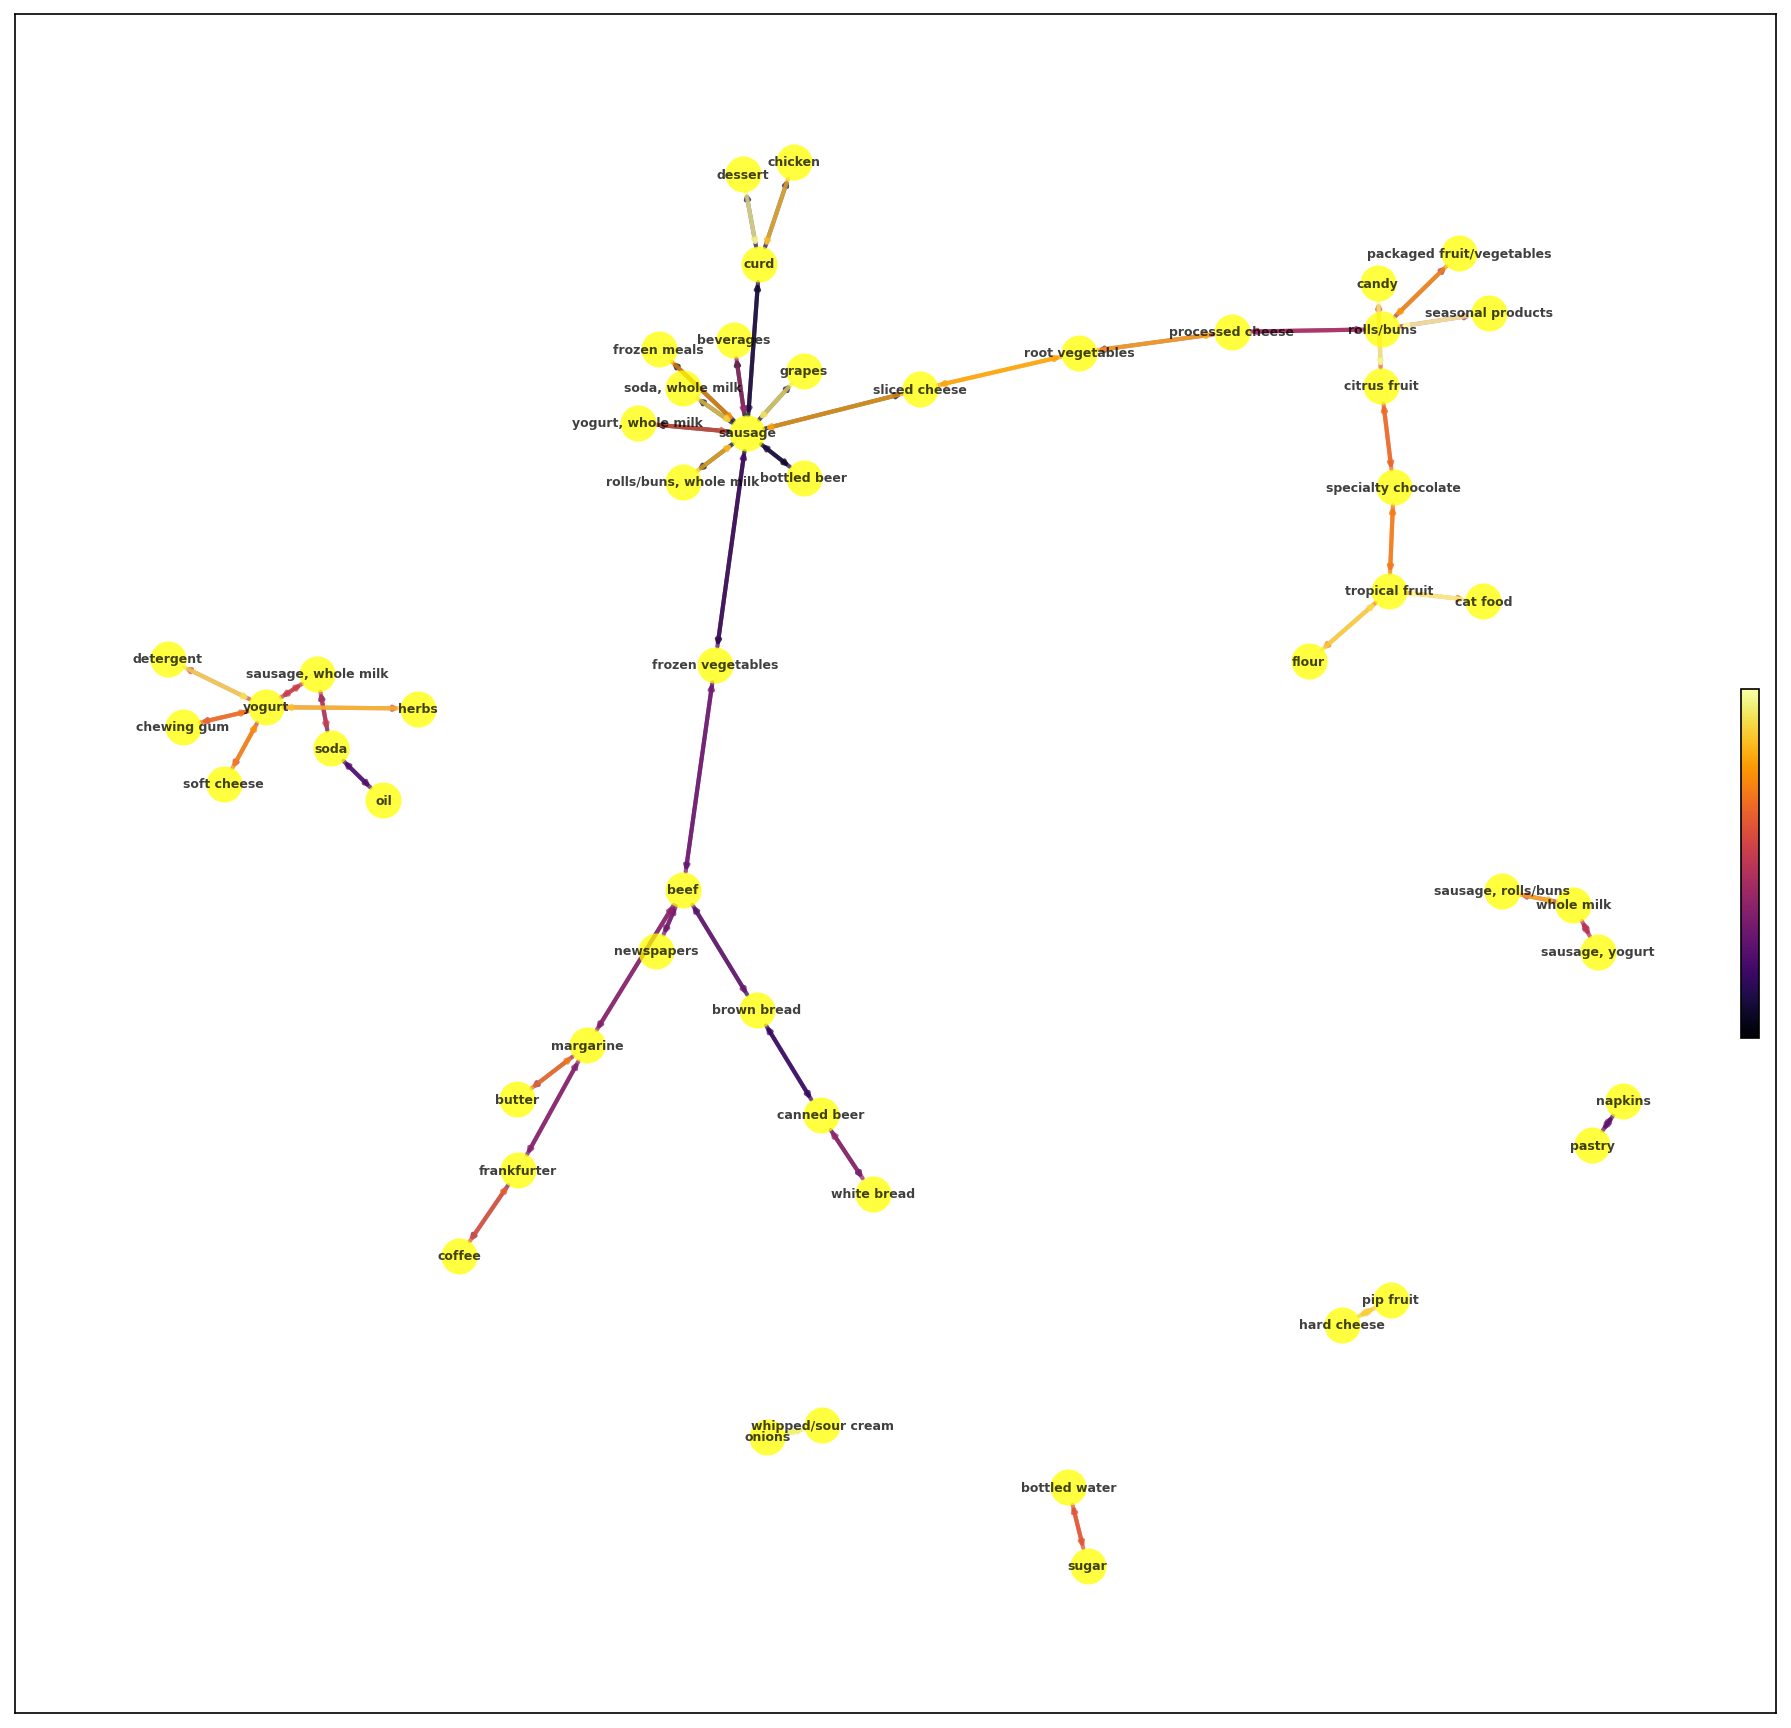

In [17]:
import networkx as nx
import matplotlib as mpl
seed = 13648 
G = nx.from_pandas_edgelist(graph, 'antecedents', 'consequents', "lift", create_using = nx.DiGraph) 
pos = nx.spring_layout(G, k = 0.20, seed = seed)
from matplotlib.pyplot import figure
from matplotlib.cm import ScalarMappable

plt.figure(figsize=(15, 15), dpi = 150, frameon = False)
M = G.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.inferno
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(0,max(edge_colors)))
sm.set_array([])
cbar = plt.colorbar(sm, ticks = [], fraction = 0.01, pad = - 0.02)
cbar.set_label("", rotation=0)
nx.draw_networkx(G, pos, 
                 node_color="yellow",
                 edge_color=edge_colors, edge_cmap=cmap, width = 2,
                 with_labels=True, font_size = 6, alpha = 0.75, font_weight = "bold",
                 arrowsize = 4, linewidths = 0)
plt.show()

Network shows relations between itemsets with lift greater then 1.2. Brighter-yellowish colors indicate higher lift while darker-bluish colors indicate lower lift between items. Given lift limitation formed 7 items groups with one big group having tree subgroup connected by bridges.

#### Degree centrality

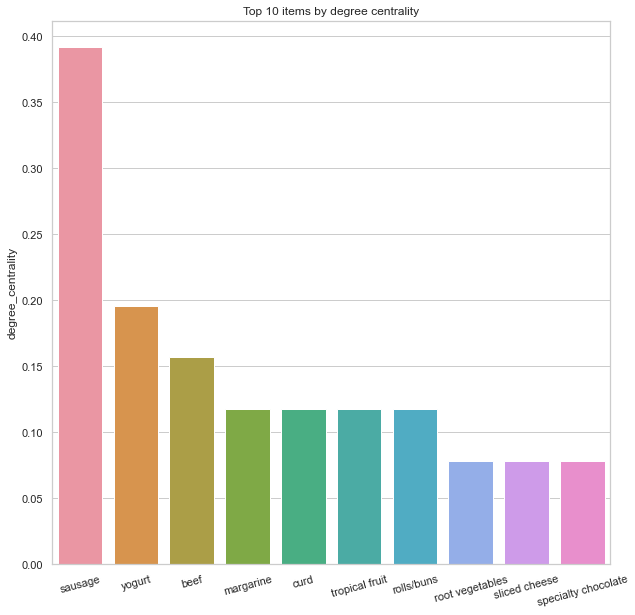

In [18]:
degree_centrality = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns = ["degree_centrality"])
degree_centrality = degree_centrality.sort_values(['degree_centrality'], ascending=False)
#plot
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 10]})
ax = sns.barplot(x = degree_centrality.index[:10], y = degree_centrality.degree_centrality[:10])
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_xticklabels(degree_centrality.index[:10], rotation = 15)
plt.title("Top 10 items by degree centrality")
plt.show()

Sausage is leading by number of connections with other items in the network.

#### Closeness 

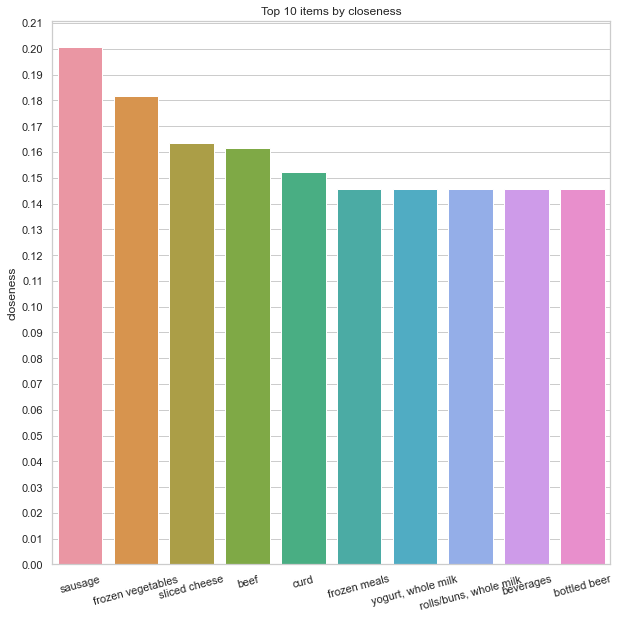

0.0876561771354497

In [24]:
close_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index', columns = ["closeness"])
close_centrality = close_centrality.sort_values(['closeness'], ascending=False)
#plot
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 10]})
ax = sns.barplot(x = close_centrality.index[:10], y = close_centrality.closeness[:10])
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.set_xticklabels(close_centrality.index[:10], rotation = 15)
plt.title("Top 10 items by closeness")
plt.show()

print(f"Closeness average: {close_centrality.closeness.mean()})

Sausage is closest to every other node. But the difference between other leading items and sausage is not big.

#### Betweeness centrality

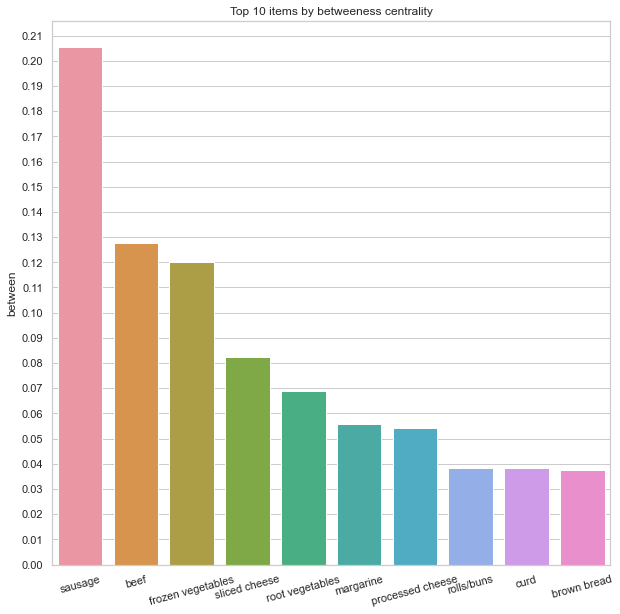

In [25]:
bet_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(G, endpoints = False),
                                        orient='index', columns = ["between"])
bet_centrality = bet_centrality.sort_values(['between'], ascending=False)
#plot
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 10]})
ax = sns.barplot(x = bet_centrality.index[:10], y = bet_centrality.between[:10])
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.set_xticklabels(bet_centrality.index[:10], rotation = 15)
plt.title("Top 10 items by betweeness centrality")
plt.show()

Sausage is a node that is a bridge from one part of a graph to another, it likes the majority of the nodes.

#### Page Rank, important nodes

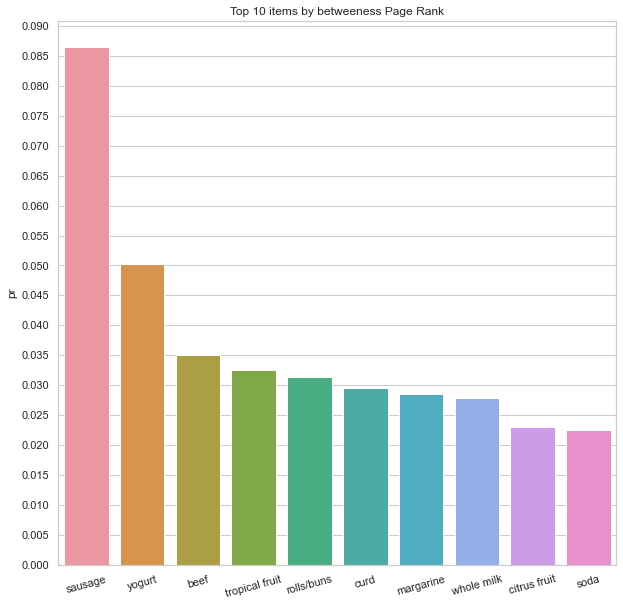

In [26]:
pr = pd.DataFrame.from_dict(nx.pagerank(G, alpha = 0.8), orient='index', columns = ["pr"])
pr = pr.sort_values(['pr'], ascending=False)
#plot
sns.set(style = "whitegrid", 
        palette= "rocket", 
        font_scale = 1,
        rc={"figure.figsize": [10, 10]})
ax = sns.barplot(x = pr.index[:10], y = pr.pr[:10])
ax.yaxis.set_major_locator(MultipleLocator(0.005))
ax.set_xticklabels(pr.index[:10], rotation = 15)
plt.title("Top 10 items by betweeness Page Rank")
plt.show()

Sausage is an important node, one with many links from other important nodes.

### Lift for itemsets

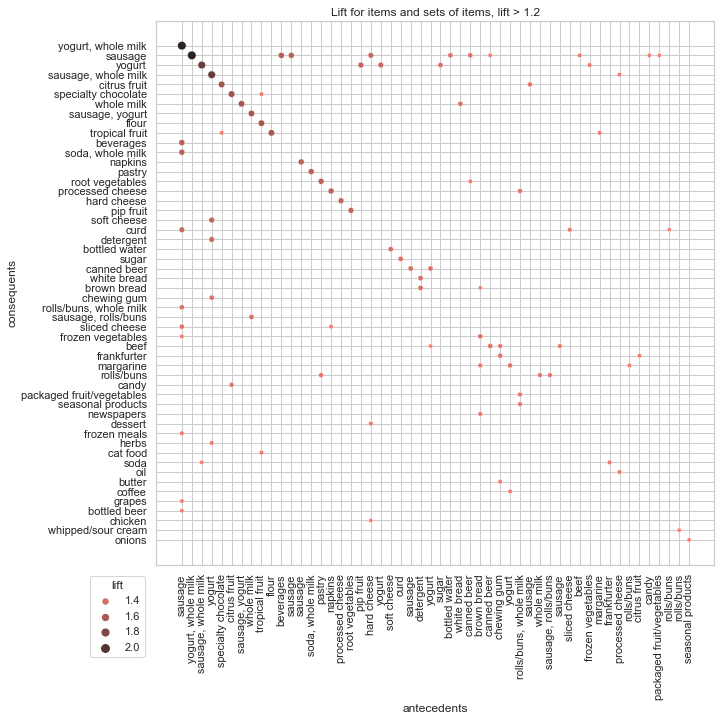

In [19]:
### lift sets
#datatransformation
graph2 = graph.sort_values(['lift'], ascending=False, ignore_index=True)
#plot
sns.set(style = "whitegrid", 
        font_scale = 1,
        rc={"figure.figsize": [10, 10]})
ax = sns.scatterplot(graph2.antecedents[:88], graph2.consequents, size = graph2.lift, hue = graph2.lift, palette = "dark:salmon_r")
plt.title("Lift for items and sets of items, lift > 1.2")
plt.legend(title = "lift", loc = (-0.12,-0.17))
ax.set_xticklabels(graph2.antecedents[:88], rotation = 90)
plt.show()

In this table, itemsets with lift greater then 1.2 are shown. The biggest likelihood indicated is true for buying yogurt and while milk together with sausage. 

### Lift vs Support

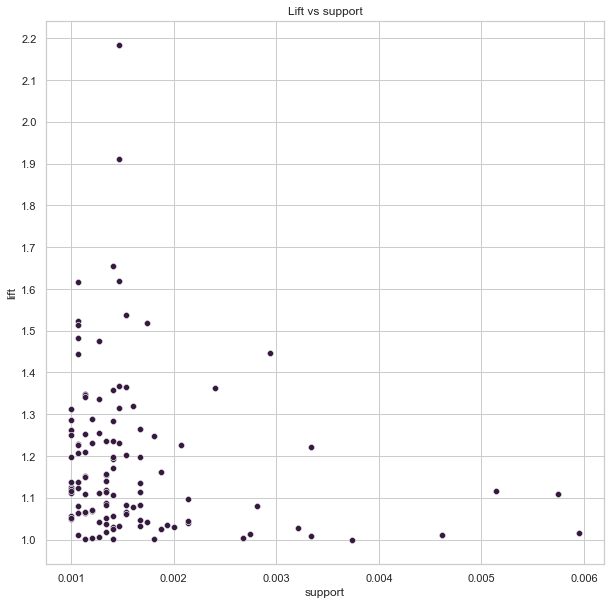

In [23]:
#data transformation
ar =association_rules(frequent_items, metric="lift", min_threshold=1)
graph3 = ar[["antecedents", "consequents", "support", "lift"]]
graph3["antecedents"] = graph3["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
graph3["consequents"] = graph3["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
#plot
sns.set(style = "whitegrid", 
        font_scale = 1,
        palette= "rocket",
        rc={"figure.figsize": [10, 10]})
ax=sns.scatterplot(graph3.support, graph3.lift)
plt.title("Lift vs support")
ax.yaxis.set_major_locator(MultipleLocator(0.1))
plt.show()

Greater lift value is associated with higher support value.